In [56]:
import pandas as pd
import numpy as np
import os
import json

import matplotlib.pyplot as plt
import seaborn as sns

import pandas.util.testing as tm

print(sns.__version__)
print(pd.__version__)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

0.10.0
1.0.1


## Get tweets dataframe 

In [96]:
df_tweets = pd.DataFrame()

tweets_dirs = os.listdir("../data/")
print(tweets_dirs)
for d in tweets_dirs:
    tweets_dir = "../data/{}".format(d)
    if os.path.isdir(tweets_dir):
        
        try:
            print("Gettind data from {}".format(tweets_dir))
            df = pd.read_csv(tweets_dir + "/tweets.csv", sep='\t', quotechar='"', error_bad_lines=False, dtype={'tweet_id_str':str})
            df["keyword"] = d
            
            if len(df_tweets) == 0:
                df_tweets = df
            else:
                df.columns = df_tweets.columns
                df_tweets = pd.concat([df_tweets, df], axis=0)
            
        except FileNotFoundError as e:
            print(e)

['PP', '.DS_Store', 'UnidasPodemos', "'PP' OR Popular OR 'Partido Popular'", 'Bildu', 'Investidurisima', 'EspañaExiste', '#SesiondeInvestidura', "'PP' OR 'Partido Popular'", 'TeruelExiste', 'VOX', 'Ciudadanos', 'Podemos', 'debateinvestidura', '#SesiondeInvestidura -filter:retweets -result_type:recent', 'ERC', 'CoaliciónCanaria', 'psoe', 'investidurasanchez', 'sanchez']
Gettind data from ../data/PP
Gettind data from ../data/UnidasPodemos
Gettind data from ../data/'PP' OR Popular OR 'Partido Popular'
Gettind data from ../data/Bildu
Gettind data from ../data/Investidurisima
Gettind data from ../data/EspañaExiste


b'Skipping line 1079: expected 17 fields, saw 18\n'
b'Skipping line 546: expected 17 fields, saw 24\n'


Gettind data from ../data/#SesiondeInvestidura


b'Skipping line 2554: expected 17 fields, saw 24\nSkipping line 14048: expected 17 fields, saw 24\nSkipping line 14588: expected 17 fields, saw 24\n'


Gettind data from ../data/'PP' OR 'Partido Popular'
Gettind data from ../data/TeruelExiste
Gettind data from ../data/VOX


b'Skipping line 8978: expected 17 fields, saw 24\nSkipping line 13922: expected 17 fields, saw 24\nSkipping line 18829: expected 17 fields, saw 24\nSkipping line 19232: expected 17 fields, saw 24\nSkipping line 19281: expected 17 fields, saw 24\nSkipping line 19891: expected 17 fields, saw 24\nSkipping line 31600: expected 17 fields, saw 24\n'


Gettind data from ../data/Ciudadanos
Gettind data from ../data/Podemos


b'Skipping line 52511: expected 17 fields, saw 24\nSkipping line 62979: expected 17 fields, saw 24\n'
/Users/rocio/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (6,7,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Gettind data from ../data/debateinvestidura


b'Skipping line 8193: expected 17 fields, saw 24\nSkipping line 10785: expected 17 fields, saw 24\n'


Gettind data from ../data/#SesiondeInvestidura -filter:retweets -result_type:recent
Gettind data from ../data/ERC


b'Skipping line 1986: expected 17 fields, saw 24\nSkipping line 5917: expected 17 fields, saw 24\nSkipping line 6862: expected 17 fields, saw 24\nSkipping line 7455: expected 17 fields, saw 24\nSkipping line 9472: expected 17 fields, saw 24\nSkipping line 9859: expected 17 fields, saw 24\nSkipping line 9906: expected 17 fields, saw 24\nSkipping line 9954: expected 17 fields, saw 24\nSkipping line 12682: expected 17 fields, saw 24\nSkipping line 13307: expected 17 fields, saw 24\nSkipping line 16176: expected 17 fields, saw 24\nSkipping line 16186: expected 17 fields, saw 24\nSkipping line 16206: expected 17 fields, saw 24\nSkipping line 19271: expected 17 fields, saw 24\nSkipping line 19328: expected 17 fields, saw 24\nSkipping line 19358: expected 17 fields, saw 24\nSkipping line 19404: expected 17 fields, saw 24\nSkipping line 21051: expected 17 fields, saw 24\nSkipping line 21124: expected 17 fields, saw 24\nSkipping line 21307: expected 17 fields, saw 24\nSkipping line 21401: expec

Gettind data from ../data/CoaliciónCanaria
Gettind data from ../data/psoe


b'Skipping line 861: expected 17 fields, saw 24\nSkipping line 2930: expected 17 fields, saw 24\nSkipping line 4993: expected 17 fields, saw 24\nSkipping line 8363: expected 17 fields, saw 24\nSkipping line 9767: expected 17 fields, saw 24\nSkipping line 10353: expected 17 fields, saw 24\nSkipping line 10357: expected 17 fields, saw 24\nSkipping line 10446: expected 17 fields, saw 24\nSkipping line 10515: expected 17 fields, saw 24\nSkipping line 17016: expected 17 fields, saw 24\nSkipping line 17535: expected 17 fields, saw 24\nSkipping line 19052: expected 17 fields, saw 24\nSkipping line 19083: expected 17 fields, saw 24\nSkipping line 20025: expected 17 fields, saw 24\nSkipping line 20046: expected 17 fields, saw 24\nSkipping line 26082: expected 17 fields, saw 24\nSkipping line 26223: expected 17 fields, saw 24\n'


Gettind data from ../data/investidurasanchez
Gettind data from ../data/sanchez


b'Skipping line 1145: expected 17 fields, saw 24\n'


## Tweets dataframe exploration

In [97]:
df_tweets.shape

(255278, 18)

In [98]:
df_tweets.head()

,tweet_created_at,tweet_id,tweet_id_str,tweet_hashtags,tweet_language,tweet_full_text,tweet_retweet_count,tweet_favorite_count,user_id,user_id_str,user_name,user_screen_name,user_description,user_followers_count,user_friends_count,user_statuses_count,user_location,keyword
0,2020-01-12 17:47:47,1.216416e+18,1216416498371256320,"[{'text': 'ministres', 'indices': [4, 14]}, {'text': 'UnidasPodemos', 'indices': [18, 32]}]",fr,"Les de percevront juste 2.700€ par mois, ils reverseront le reste de leur revenu aux nécessiteux. https://t.co/W55440qrN2",1,1,4.328760e+08,432875983,Iris Solar 🐝,SOLARisis1,"**J'aime ce qui me nourrit : le boire, le manger, les livres ** La Boétie",1542.0,1584.0,23802.0,France,UnidasPodemos
1,2020-01-12 15:49:05,1.216387e+18,1216386625523109890,[],und,@jonerrepubli @change_es @amnistiaespana @greenpeace_esp @mundodesofia54 @pattgilmore @nisaride @reinlein @Niobeacua @JRBNIMROD @AldeasEspana @unicef_es @ACNURspain @UnidasPodemos @IreneMontero @PabloIglesias @equomadrid @agarzon @ManuelaCarmena @AssembleaXSalou https://t.co/jvWX9Gn0II,2,4,3.230294e+09,3230293839,Maria Ballesteros,reinleinm,'La memoria guardará lo que valga la pena. La memoria sabe de mí más que yo; y ella no pierde lo que merece ser salvado'.,656.0,1815.0,1931.0,NaN,UnidasPodemos
2,2020-01-12 15:38:43,1.216384e+18,1216384015474753537,[],ca,@DonMitxel_VI @EmiliPuig1 @antoniobanos_ @carlesral @mossos @PSOE @UnidasPodemos @cupnacional Què no! Que CUP i VOX han votat NO a @sanchezcastejon i estan als antípodes.,0,0,1.176389e+18,1176389223785598976,Enric Viver,EnricViver,"Filòsof, llibertari, activista pro no-violència. L'Estat espanyol és un paràsit, i ha de ser erradicat.",10.0,61.0,972.0,NaN,UnidasPodemos
3,2020-01-12 15:33:00,1.216383e+18,1216382578460188672,[],ca,@EmiliPuig1 @antoniobanos_ @carlesral @mossos Poca gent del @PSOE i de @UnidasPodemos plantant cara al feixisme. Fàcil criticar a la @cupnacional des del sofà. cc @DonMitxel_VI,2,7,1.176389e+18,1176389223785598976,Enric Viver,EnricViver,"Filòsof, llibertari, activista pro no-violència. L'Estat espanyol és un paràsit, i ha de ser erradicat.",10.0,61.0,972.0,NaN,UnidasPodemos
4,2020-01-12 14:52:04,1.216372e+18,1216372274762260480,[],und,@Vecina_Erre @UnidasPodemos .@PODEMOS,0,0,4.710290e+08,471028961,Mabel Ojeda💢,mabelsaroman,"Inmersa en el proceso de adopción con el CI desde hace años, y tú ¿has adoptado? 4IAs 1Fiv SS anulada x no estar para la fecha fijada.2Fiv-",1022.0,1003.0,22547.0,"Cantabria, España",UnidasPodemos


Text(0.5, 1.0, 'Number of tweets for each keyword')

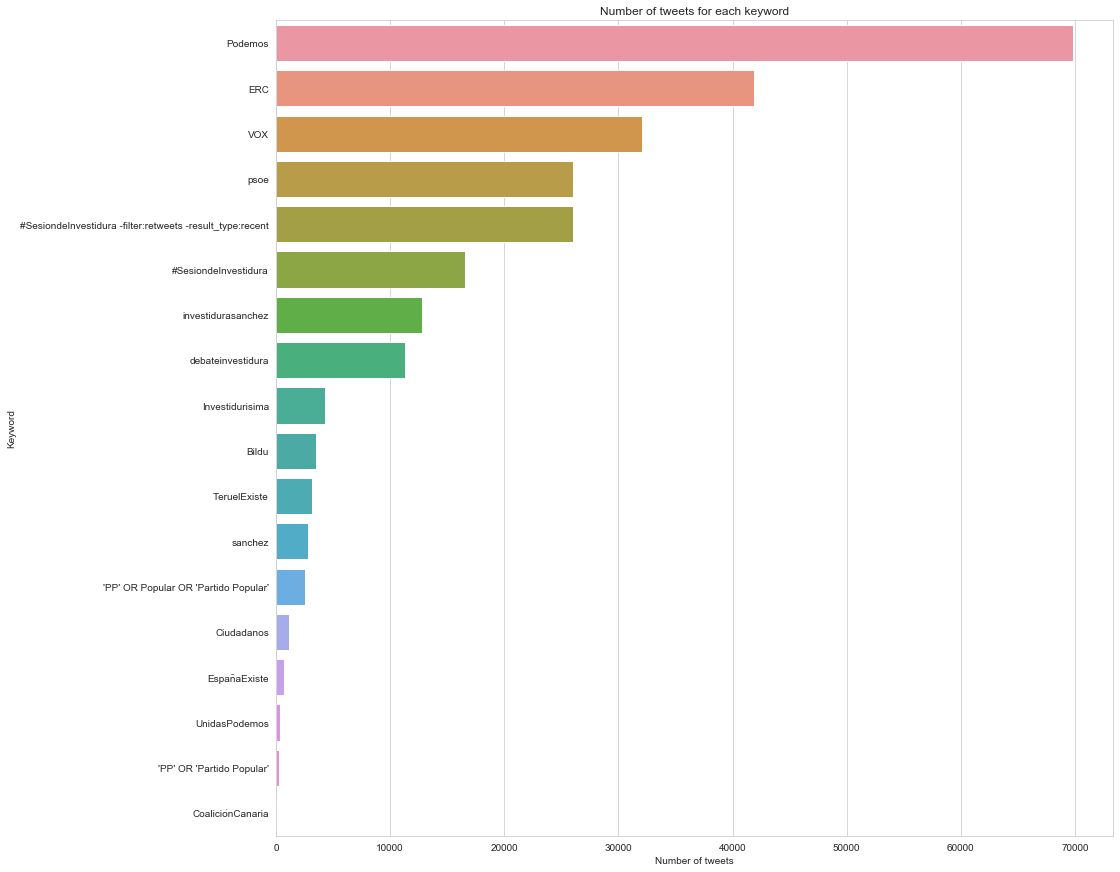

In [99]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 15))
ax = sns.countplot(y="keyword", data=df_tweets, order=df_tweets['keyword'].value_counts().index)
ax.set_xlabel("Number of tweets")
ax.set_ylabel("Keyword")
ax.set_title("Number of tweets for each keyword")

Text(0.5, 1.0, 'Number of tweets for each keyword (in Spanish)')

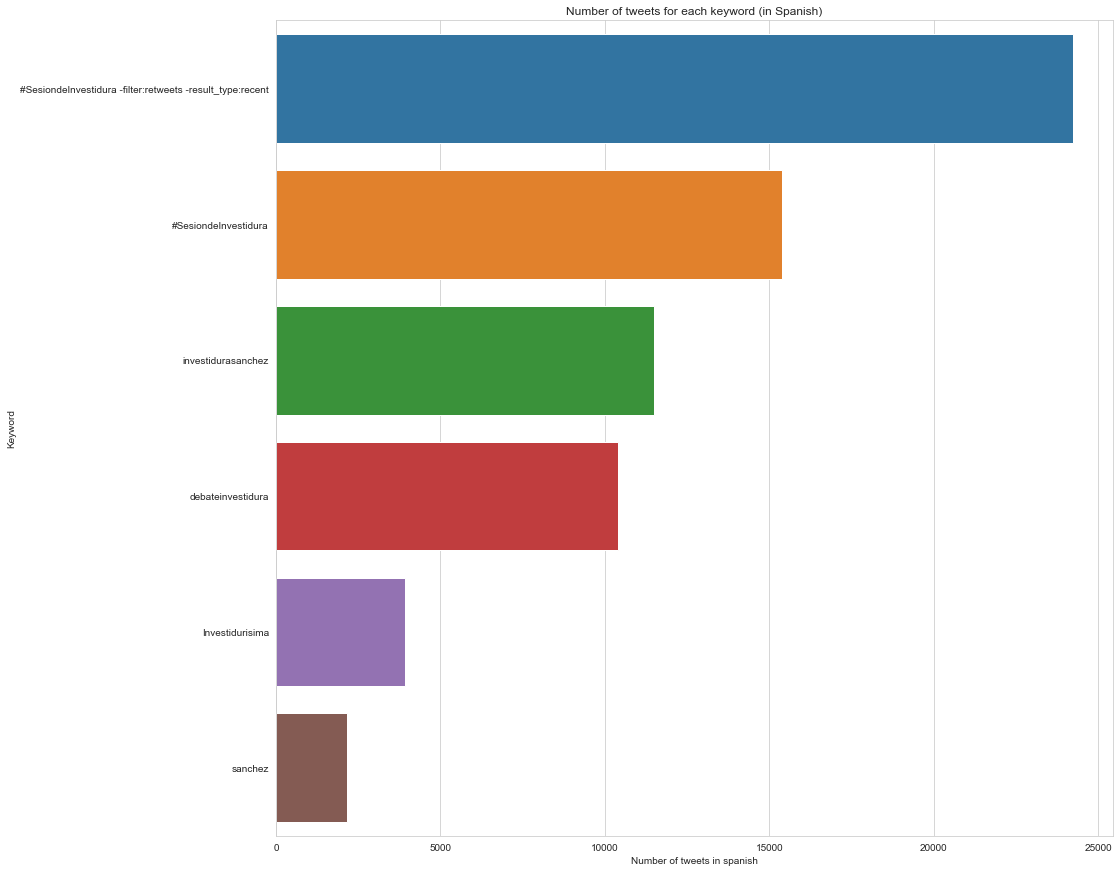

In [100]:
sns.set_style("whitegrid")

df_tweets_es = df_tweets.loc[df_tweets['tweet_language']=="es",:]

plt.figure(figsize=(15, 15))
ax = sns.countplot(y="keyword", data=df_tweets_es, order=df_tweets_es['keyword'].value_counts().index)
ax.set_xlabel("Number of tweets in spanish")
ax.set_ylabel("Keyword")
ax.set_title("Number of tweets for each keyword (in Spanish)")

In [101]:
df_tweets_es.shape

(67570, 18)

In [102]:
pd.set_option('display.max_colwidth', None)
df_tweets_es.loc[:, 'tweet_full_text'].unique()

array(['Nuevo vídeo de Un Tío Blanco Hetero.         https://t.co/1VrMCTGVUz',
       'Pablo Casado (2020): Ya no puedo gobernar. Me voy a afeitar" @pablocasado_   @populares                           https://t.co/a9Wg2ANVY0"',
       'Pues a mí, es hablarme de postconvercencia o espacio convergente y se me viene a la cabeza @Esquerra_ERC. No me digáis porqué 🤷\u200d♂️.       https://t.co/8MOnqxaUHx',
       ..., '@NataliaArana19 @abcespana Menudo hdlgp el Sánchez!!!',
       'Sánchez elige perfiles técnicos para su gobierno. Por Linda Galmor y Guirong Fu  https://t.co/mplXKErdbe vía @lapaseata',
       'Vox exhibe hoy su fuerza contra Sánchez con una gran protesta https://t.co/OM6Jt9ZGzP vía @ABCespana'],
      dtype=object)

## Get all hashtags

In [103]:
hash_tags = [{'text': 'Investidurísima', 'indices': [37, 53]}, 
             {'text': 'Podemos', 'indices': [54, 62]}, 
             {'text': 'MinisteriodeMamellas', 'indices': [63, 84]}, 
             {'text': 'Mmmmm', 'indices': [85, 91]}]

for h in hash_tags:
    print(h['text'])

Investidurísima
Podemos
MinisteriodeMamellas
Mmmmm


In [104]:
df_tweets_es.dtypes

tweet_created_at         object
tweet_id                float64
tweet_id_str             object
tweet_hashtags           object
tweet_language           object
tweet_full_text          object
tweet_retweet_count      object
tweet_favorite_count     object
user_id                 float64
user_id_str              object
user_name                object
user_screen_name         object
user_description         object
user_followers_count    float64
user_friends_count      float64
user_statuses_count     float64
user_location            object
keyword                  object
dtype: object

In [105]:
import ast
df = df_tweets_es.loc[:, ["tweet_id_str", "tweet_hashtags"]]
df['list_hashtags'] = df['tweet_hashtags'].apply(lambda x : ast.literal_eval(x))
df['n_hashtags'] = df['list_hashtags'].apply(lambda x : len(x))
df['hashtags_text'] = df['list_hashtags'].apply(lambda x : [hashtag['text'] for hashtag in x])
df

,tweet_id_str,tweet_hashtags,list_hashtags,n_hashtags,hashtags_text
0,1215369133350703105,"[{'text': 'Investidurísima', 'indices': [37, 53]}, {'text': 'Podemos', 'indices': [54, 62]}, {'text': 'MinisteriodeMamellas', 'indices': [63, 84]}, {'text': 'Mmmmm', 'indices': [85, 91]}]","[{'text': 'Investidurísima', 'indices': [37, 53]}, {'text': 'Podemos', 'indices': [54, 62]}, {'text': 'MinisteriodeMamellas', 'indices': [63, 84]}, {'text': 'Mmmmm', 'indices': [85, 91]}]",4,"[Investidurísima, Podemos, MinisteriodeMamellas, Mmmmm]"
2,1215303659673870336,"[{'text': 'pablocasado', 'indices': [76, 88]}, {'text': 'pp', 'indices': [100, 103]}, {'text': 'partidopopular', 'indices': [104, 119]}, {'text': 'barba', 'indices': [120, 126]}, {'text': 'hipster', 'indices': [127, 135]}, {'text': 'investidurasanchez', 'indices': [136, 155]}, {'text': 'Investidura', 'indices': [156, 168]}, {'text': 'Investidurisima', 'indices': [169, 185]}, {'text': 'GobiernoProgresista', 'indices': [186, 206]}, {'text': 'Gobiernodecoalicion', 'indices': [207, 227]}, {'text': 'Gobierno', 'indices': [228, 237]}, {'text': 'GobiernoDeTodos', 'indices': [238, 254]}, {'text': 'casadodesbocado', 'indices': [255, 271]}, {'text': 'Casado', 'indices': [272, 279]}]","[{'text': 'pablocasado', 'indices': [76, 88]}, {'text': 'pp', 'indices': [100, 103]}, {'text': 'partidopopular', 'indices': [104, 119]}, {'text': 'barba', 'indices': [120, 126]}, {'text': 'hipster', 'indices': [127, 135]}, {'text': 'investidurasanchez', 'indices': [136, 155]}, {'text': 'Investidura', 'indices': [156, 168]}, {'text': 'Investidurisima', 'indices': [169, 185]}, {'text': 'GobiernoProgresista', 'indices': [186, 206]}, {'text': 'Gobiernodecoalicion', 'indices': [207, 227]}, {'text': 'Gobierno', 'indices': [228, 237]}, {'text': 'GobiernoDeTodos', 'indices': [238, 254]}, {'text': 'casadodesbocado', 'indices': [255, 271]}, {'text': 'Casado', 'indices': [272, 279]}]",14,"[pablocasado, pp, partidopopular, barba, hipster, investidurasanchez, Investidura, Investidurisima, GobiernoProgresista, Gobiernodecoalicion, Gobierno, GobiernoDeTodos, casadodesbocado, Casado]"
4,1215286642463977476,"[{'text': 'MisCosas', 'indices': [132, 141]}, {'text': 'pagafantas', 'indices': [142, 153]}, {'text': 'Investidurisima', 'indices': [154, 170]}]","[{'text': 'MisCosas', 'indices': [132, 141]}, {'text': 'pagafantas', 'indices': [142, 153]}, {'text': 'Investidurisima', 'indices': [154, 170]}]",3,"[MisCosas, pagafantas, Investidurisima]"
5,1215284526299189248,"[{'text': 'Investidurisima', 'indices': [124, 140]}]","[{'text': 'Investidurisima', 'indices': [124, 140]}]",1,[Investidurisima]
6,1215281746813603842,"[{'text': 'Gobierno', 'indices': [61, 70]}, {'text': 'GobiernoProgresista', 'indices': [71, 91]}, {'text': 'Gobiernocoalición', 'indices': [92, 110]}, {'text': 'Gobiernodecoalición', 'indices': [111, 131]}, {'text': 'debateinvestidura', 'indices': [132, 150]}, {'text': 'debatedeinvestidura', 'indices': [151, 171]}, {'text': 'Sánchez', 'indices': [172, 180]}, {'text': 'PedroSánchez', 'indices': [181, 194]}, {'text': 'investiduraSánchez', 'indices': [195, 214]}, {'text': 'Investidurisima', 'indices': [215, 231]}, {'text': 'investidura', 'indices': [232, 244]}, {'text': 'investiduraARV', 'indices': [245, 260]}]","[{'text': 'Gobierno', 'indices': [61, 70]}, {'text': 'GobiernoProgresista', 'indices': [71, 91]}, {'text': 'Gobiernocoalición', 'indices': [92, 110]}, {'text': 'Gobiernodecoalición', 'indices': [111, 131]}, {'text': 'debateinvestidura', 'indices': [132, 150]}, {'text': 'debatedeinvestidura', 'indices': [151, 171]}, {'text': 'Sánchez', 'indices': [172, 180]}, {'text': 'PedroSánchez', 'indices': [181, 194]}, {'text': 'investiduraSánchez', 'indices': [195, 214]}, {'text': 'Investidurisima', 'indices': [215, 231]}, {'text': 'investidura', 'indices': [232, 244]}, {'text': 'investiduraARV', 'indices': [245, 260]}]",12,"[Gobierno, GobiernoProgresista, Gobiernocoalición, Gobiernodecoalición, debateinvestidura, debatedeinvestid

In [116]:
res = df.set_index(["tweet_id_str"])['hashtags_text'].apply(pd.Series).stack()
res = res.reset_index()


In [117]:
res.head()

,tweet_id_str,level_1,0
0,1215369133350703105,0,Investidurísima
1,1215369133350703105,1,Podemos
2,1215369133350703105,2,MinisteriodeMamellas
3,1215369133350703105,3,Mmmmm
4,1215303659673870336,0,pablocasado


In [119]:
res.drop(["level_1"], inplace=True, axis=1)

In [121]:
res.columns = ["tweet_id_str", "hashtag"]
res.head()

,tweet_id_str,hashtag
0,1215369133350703105,Investidurísima
1,1215369133350703105,Podemos
2,1215369133350703105,MinisteriodeMamellas
3,1215369133350703105,Mmmmm
4,1215303659673870336,pablocasado


In [124]:
df_hashtags_count = pd.DataFrame(res.groupby(["hashtag"]).size())
df_hashtags_count.reset_index(inplace=True)
df_hashtags_count.columns = ["hashtag", "size"]
df_hashtags_count.head()

,hashtag,size
0,04Ene,5
1,05Ene,2
2,07deEnero,2
3,100añosSinÉl,1
4,108MPNewWorld,1


In [126]:
df_hashtags_count = df_hashtags_count.sort_values("size", ascending=False)
df_hashtags_count.head()

,hashtag,size
2743,SesionDeInvestidura,30703
4294,investidurasanchez,14405
3745,debateinvestidura,14116
2754,SesiónDeInvestidura,9791
1500,Investidurisima,5231


Text(0.5, 1.0, 'Number of tweets for each keyword (in Spanish)')

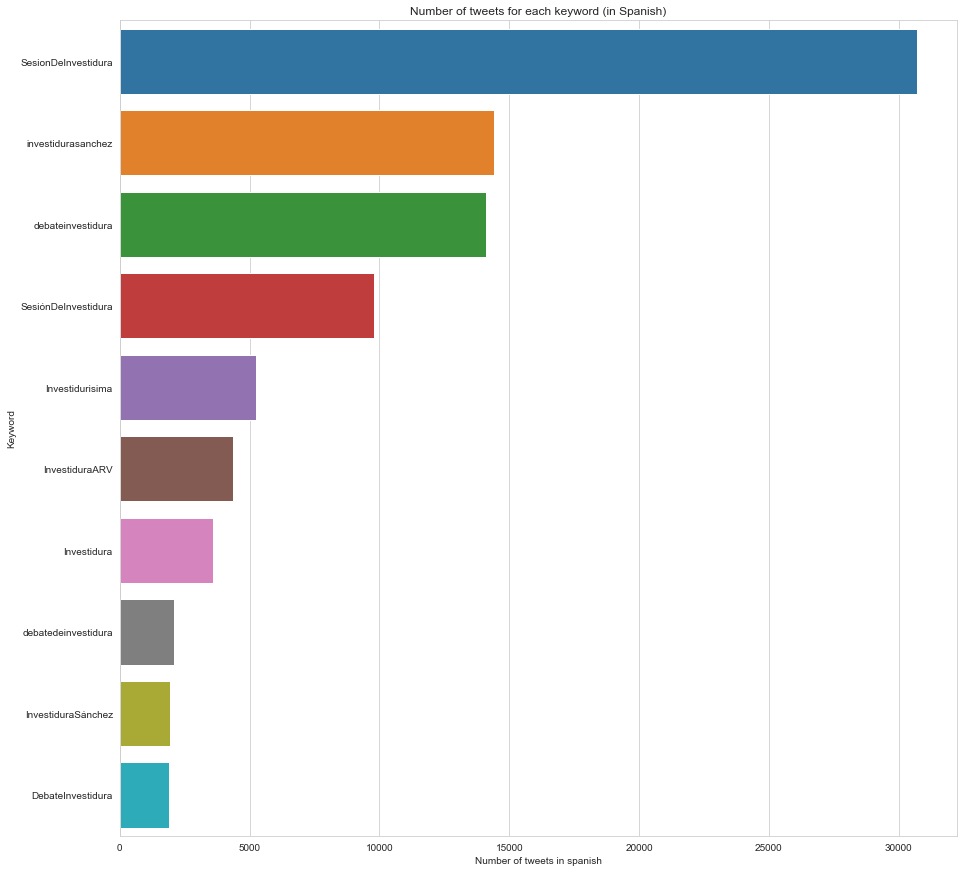

In [127]:
plt.figure(figsize=(15, 15))
ax = sns.barplot(x="size", y="hashtag", data=df_hashtags_count.head(10))
ax.set_xlabel("Number of tweets in spanish")
ax.set_ylabel("Keyword")
ax.set_title("Number of tweets for each keyword (in Spanish)")

In [130]:
df_tweets_analysis = df_tweets_es.loc[:,["tweet_id_str", "tweet_full_text"]].merge(res, on="tweet_id_str")
df_tweets_analysis.head(10)

,tweet_id_str,tweet_full_text,hashtag
0,1215369133350703105,Nuevo vídeo de Un Tío Blanco Hetero. https://t.co/1VrMCTGVUz,Investidurísima
1,1215369133350703105,Nuevo vídeo de Un Tío Blanco Hetero. https://t.co/1VrMCTGVUz,Podemos
2,1215369133350703105,Nuevo vídeo de Un Tío Blanco Hetero. https://t.co/1VrMCTGVUz,MinisteriodeMamellas
3,1215369133350703105,Nuevo vídeo de Un Tío Blanco Hetero. https://t.co/1VrMCTGVUz,Mmmmm
4,1215303659673870336,"Pablo Casado (2020): Ya no puedo gobernar. Me voy a afeitar"" @pablocasado_ @populares https://t.co/a9Wg2ANVY0""",pablocasado
5,1215303659673870336,"Pablo Casado (2020): Ya no puedo gobernar. Me voy a afeitar"" @pablocasado_ @populares https://t.co/a9Wg2ANVY0""",pp
6,1215303659673870336,"Pablo Casado (2020): Ya no puedo gobernar. Me voy a afeitar"" @pablocasado_ @populares https://t.co/a9Wg2ANVY0""",partidopopular
7,1215303659673870336,"Pablo Casado (2020): Ya no puedo gobernar. Me voy a afeitar"" @pablocasado_ @populares https://t.co/a9Wg2ANVY0""",barba
8,1215303659673870336,"Pablo Casado (2020): Ya no puedo gobernar. Me voy a afeitar"" @pablocasado_ @populares https://t.co/a9Wg2ANVY0""",hipster
9,1215303659673870336,"Pablo Casado (2020): Ya no puedo gobernar. Me voy a afeitar"" @pablocasado_ @populares https://t.co/a9Wg2ANVY0""",investidurasanchez
